<a href="https://colab.research.google.com/github/Maks12435/ML-projects/blob/main/Bus_passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Flatten
from tensorflow.keras.models import Sequential

In [ ]:
df = pd.read_excel('/content/Bus.xlsx')

In [ ]:
data = df

In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')
data['arrival_time'] = pd.to_datetime(data['arrival_time'], format='%H:%M:%S').dt.time
data['departure_time'] = pd.to_datetime(data['departure_time'], format='%H:%M:%S').dt.time

In [ ]:
from datetime import datetime, timedelta

def time_diff(row, data):

    current_index = row.name
    next_index = current_index + 1

    if next_index < len(data):
        dt1 = datetime.combine(datetime.today(), row['departure_time'])
        dt2 = datetime.combine(datetime.today(), data.loc[next_index, 'arrival_time'])
        x = (dt2 - dt1).total_seconds()
        if x < 0 or x > 1000:
            return pd.NaT
        else:
            return x
    else:
        return pd.NaT

data['travel_time'] = data.apply(time_diff, axis=1, args=(data,))

In [ ]:
data['day_of_week'] = data['date'].dt.dayofweek
data['hour'] = data['arrival_time'].apply(lambda x: x.hour)
data['dwell_time_in_seconds'] = data['dwell_time_in_seconds'].astype(float)
data['total_travel_time'] = data['travel_time'] + data['dwell_time_in_seconds']

In [ ]:
data.head(20)

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time_in_seconds,travel_time,day_of_week,hour,total_travel_time
0,1,262,1,101,2021-10-01,06:40:58,06:42:12,74.0,210.0,4,6,284.0
1,1,262,1,102,2021-10-01,06:45:42,06:45:42,0.0,496.0,4,6,496.0
2,1,262,1,103,2021-10-01,06:53:58,06:54:04,6.0,195.0,4,6,201.0
3,1,262,1,104,2021-10-01,06:57:19,06:57:19,0.0,97.0,4,6,97.0
4,1,262,1,105,2021-10-01,06:58:56,07:02:27,211.0,210.0,4,6,421.0
5,1,262,1,106,2021-10-01,07:05:57,07:06:32,35.0,45.0,4,7,80.0
6,1,262,1,107,2021-10-01,07:07:17,07:07:42,25.0,99.0,4,7,124.0
7,1,262,1,108,2021-10-01,07:09:21,07:09:44,23.0,34.0,4,7,57.0
8,1,262,1,109,2021-10-01,07:10:18,07:11:02,44.0,149.0,4,7,193.0
9,1,262,1,110,2021-10-01,07:13:31,07:14:05,34.0,150.0,4,7,184.0


In [ ]:
final_data = data.drop(['date', 'arrival_time', 'departure_time'], axis=1)
final_data.dropna(inplace=True)

In [ ]:
sample = final_data[final_data['direction'] == 1]

In [ ]:
b2 = pd.read_excel('/content/bus2.xlsx')
b2['date'] = pd.to_datetime(b2['date'], format='%m/%d/%Y')
b2['day_of_week'] = b2['date'].dt.dayofweek
b2['hour'] = b2['start_time'].apply(lambda x: x.hour)

In [ ]:
b2.drop(['start_terminal', 'end_terminal', 'start_time', 'end_time', 'date', 'duration'], axis=1, inplace=True)

In [ ]:
b2

,trip_id,deviceid,direction,duration_in_mins,day_of_week,hour
0,1,262,1,47.72,6,6
1,3,274,2,53.30,6,6
2,4,123,2,44.75,6,7
3,8,274,1,54.37,6,8
4,9,262,2,52.75,6,8
...,...,...,...,...,...,...
9826,10220,121,1,47.43,0,18
9827,10221,1143,2,49.33,0,18
9828,10222,116,1,52.28,0,18
9829,10223,250,1,55.53,0,19


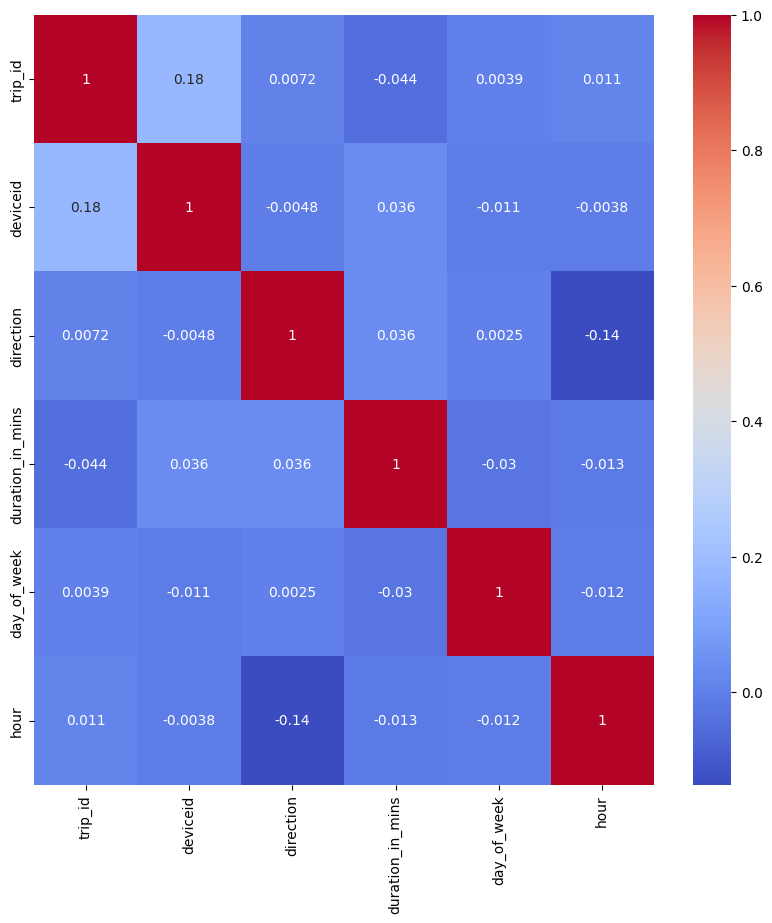

In [ ]:
corr = b2.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

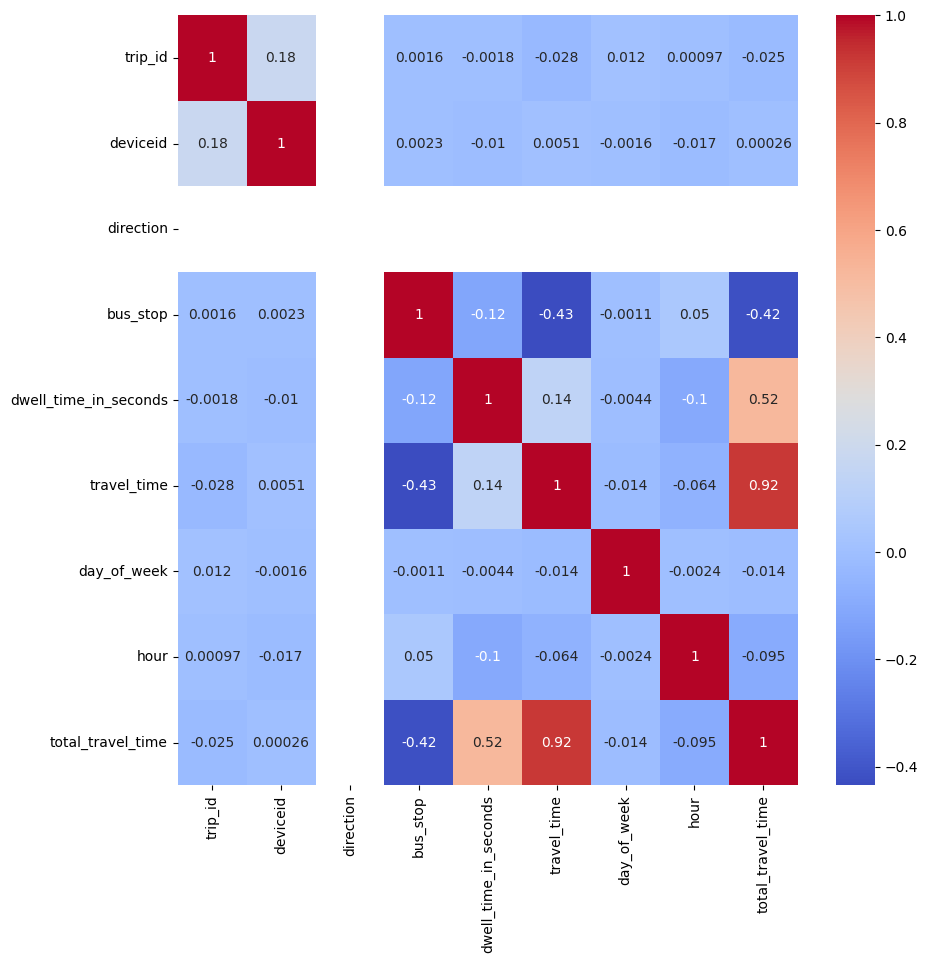

In [ ]:
corr = sample.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

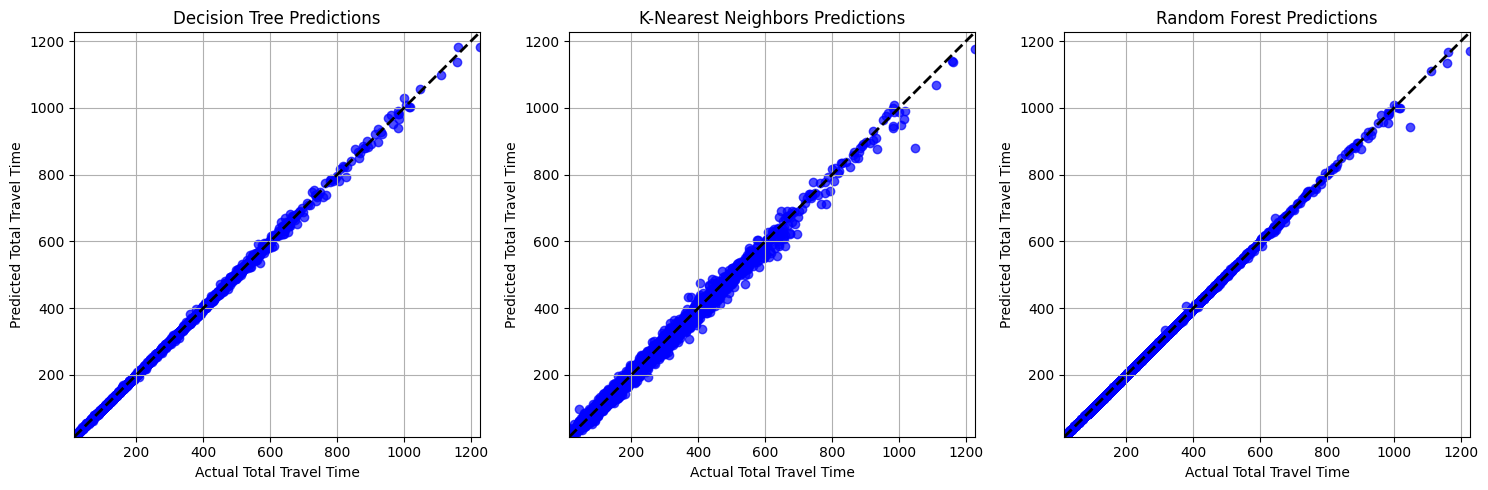

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

models = [DecisionTreeRegressor(), KNeighborsRegressor(), RandomForestRegressor()]
model_names = ["Decision Tree", "K-Nearest Neighbors", "Random Forest"]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

n = 1

plt.figure(figsize=(15, 5))

for i, mdl in enumerate(models):
    y_pred_sum = 0
    for j in range(n):
        mdl.fit(X_train, y_train)
        y_pred_sum += mdl.predict(X_test)
    y_pred = y_pred_sum / n

    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.title(f'{model_names[i]} Predictions')
    plt.xlabel('Actual Total Travel Time')
    plt.ylabel('Predicted Total Travel Time')
    plt.xlim(y_test.min(), y_test.max())
    plt.ylim(y_test.min(), y_test.max())
    plt.grid()

plt.tight_layout()
plt.show()



Epoch 1/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 23250.6602 - mse: 23250.6602 - val_loss: 79.0369 - val_mse: 79.0369
Epoch 2/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 42.5828 - mse: 42.5828 - val_loss: 4.8689 - val_mse: 4.8689
Epoch 3/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 3.5888 - mse: 3.5888 - val_loss: 0.9959 - val_mse: 0.9959
Epoch 4/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.9135 - mse: 0.9135 - val_loss: 0.4912 - val_mse: 0.4912
Epoch 5/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3382 - mse: 0.3382 - val_loss: 0.1558 - val_mse: 0.1558
Epoch 6/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1323 - mse: 0.1323 - val_loss: 0.0718 - val_mse: 0.0718
Epoch 7/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0738 - mse: 0.0738 - val_loss: 0.2502 - val_mse: 0.2502
Epoch 8/10
1607/1607 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0887 - mse: 0.0887 - val_loss: 0.1223 - val_mse: 0.1223
Epoch 9/10
1607/1607 ━━━━━━━

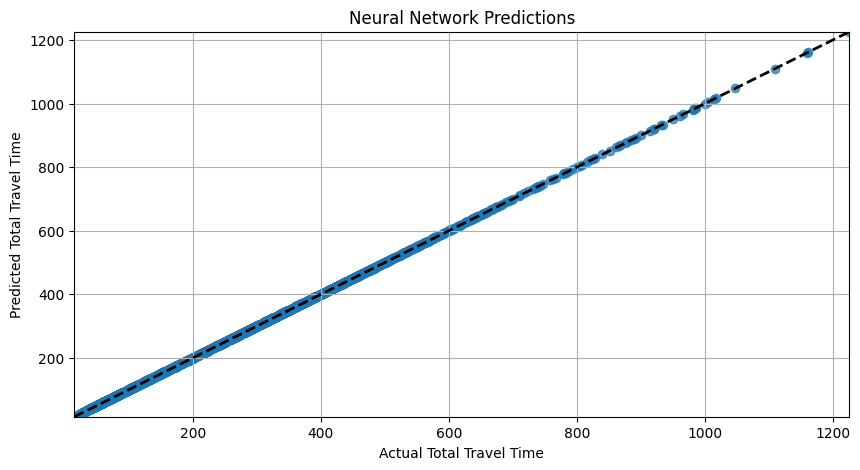

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

X = sample[['bus_stop', 'hour', 'day_of_week', 'dwell_time_in_seconds', 'travel_time']]
y = sample['total_travel_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

y_train = pd.to_numeric(y_train, errors='coerce').fillna(0)
y_test = pd.to_numeric(y_test, errors='coerce').fillna(0)

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error: {mae}')

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Neural Network Predictions')
plt.xlabel('Actual Total Travel Time')
plt.ylabel('Predicted Total Travel Time')
plt.xlim(y_test.min(), y_test.max())
plt.ylim(y_test.min(), y_test.max())
plt.grid()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_test

y_pred = y_pred.flatten()

table = pd.DataFrame({'Expected': y_test, 'Predicted': y_pred})
table

199/199 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Expected,Predicted
74480,454.0,454.223480
34938,318.0,318.119507
48956,257.0,257.089966
26791,468.0,468.478760
55613,472.0,472.296387
...,...,...
60094,62.0,61.982262
56508,126.0,126.162483
26673,300.0,300.313110
83569,116.0,115.972824


In [ ]:
from datetime import datetime

now = datetime.now()
current_hour = now.hour
current_day_of_week = now.weekday()
your_stop = 101

print(f'Current Hour: {current_hour}')
print(f'Current Day of Week: {current_day_of_week}')

filtered_data = sample[sample['hour'] == current_hour]
average_dwell_time = filtered_data['dwell_time_in_seconds'].mean()
average_travel_time = filtered_data['travel_time'].mean()

average_dwell_time = average_dwell_time if not np.isnan(average_dwell_time) else 0
average_travel_time = average_travel_time if not np.isnan(average_travel_time) else 0

print(f'avg_dwell: {average_dwell_time}')
print(f'avg_travel: {average_travel_time}')

now = datetime.now()
current_hour = now.hour
current_day_of_week = now.weekday()
new_record = np.array([[your_stop, current_hour, now.weekday(), average_dwell_time, average_travel_time]])

new_record_scaled = scaler.transform(new_record)

prediction = model.predict(new_record_scaled)

minutes = prediction[0] // 60
seconds = prediction[0] % 60

print("╔════════════════════════════════╗")
print(f"║ {int(minutes[0])} min {int(seconds[0])} sec")
print("╚════════════════════════════════╝")


Current Hour: 5
Current Day of Week: 6
avg_dwell: 7.7272727272727275
avg_travel: 231.45454545454547
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
╔════════════════════════════════╗
║ 3 min 59 sec
╚════════════════════════════════╝


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


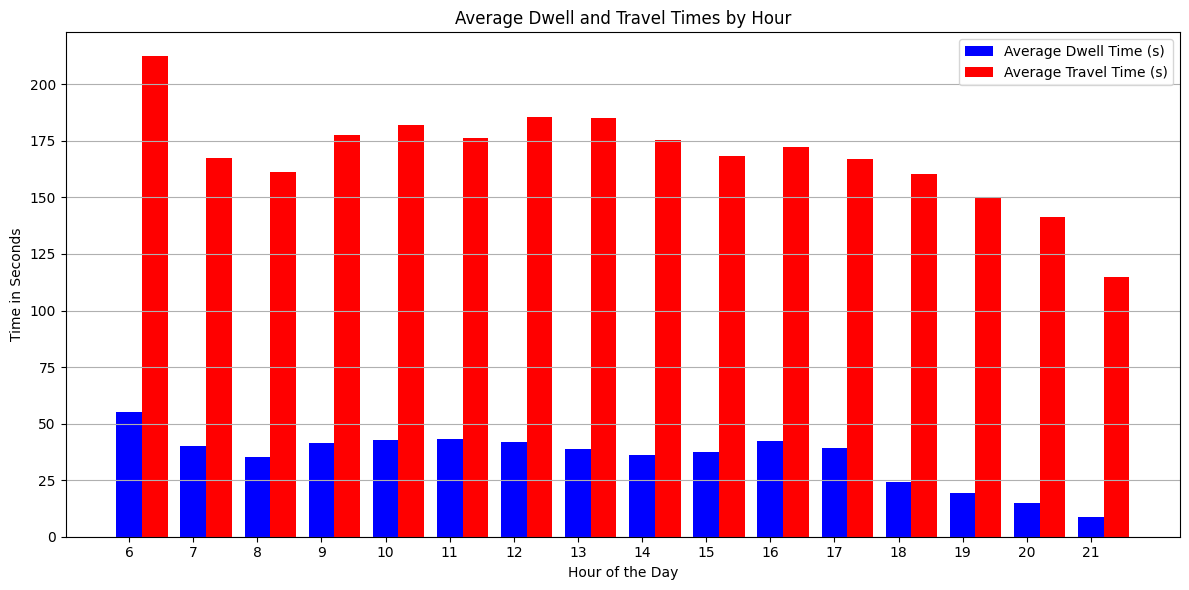

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

hours = []
average_dwell_times = []
average_travel_times = []

for i in range(6, 22):
    filtered_data = sample[sample['hour'] == i]
    average_dwell_time = filtered_data['dwell_time_in_seconds'].mean()
    average_travel_time = filtered_data['travel_time'].mean()

    average_dwell_time = average_dwell_time if not np.isnan(average_dwell_time) else 0
    average_travel_time = average_travel_time if not np.isnan(average_travel_time) else 0

    hours.append(i)
    average_dwell_times.append(average_dwell_time)
    average_travel_times.append(average_travel_time)

plt.figure(figsize=(12, 6))
plt.bar(hours, average_dwell_times, width=0.4, label='Average Dwell Time (s)', color='b', align='center')
plt.bar(np.array(hours) + 0.4, average_travel_times, width=0.4, label='Average Travel Time (s)', color='r', align='center')
plt.title('Average Dwell and Travel Times by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Time in Seconds')
plt.xticks(hours)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
